<a href="https://colab.research.google.com/github/souvik25162/Time-Series-Analysis-and-forecasting/blob/master/Sales_forecast1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1EZTIPi28MO-nW0IxgD8T4Lb6od4ZndM5'})
downloaded.GetContentFile('sales_train.csv')

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm

In [ ]:
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
df=pd.read_csv('sales_train.csv')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [ ]:
print("start date is:",df['date'].min())
print("end date is:", df['date'].max())

start date is: 01.01.2013
end date is: 31.12.2014


In [ ]:
import datetime
df['date']=pd.to_datetime(df.date)

In [ ]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
data=df[['date','item_cnt_day']]

In [ ]:
data.head()

,date,item_cnt_day
0,2013-02-01,1.0
1,2013-03-01,1.0
2,2013-05-01,-1.0
3,2013-06-01,1.0
4,2013-01-15,1.0


In [ ]:
data.shape

(2935849, 2)

In [ ]:
#data = data.groupby('date')['item_cnt_day'].sum().reset_index()

In [ ]:
data.head()

,date,item_cnt_day
0,2013-02-01,1.0
1,2013-03-01,1.0
2,2013-05-01,-1.0
3,2013-06-01,1.0
4,2013-01-15,1.0


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
monthly_salesdf=df.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

In [ ]:
monthly_salesdf.head(10)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-21 2013-03-01      221.0          6.0
                       33      2013-01-17 2013-03-01      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-10-01 2013-10-01      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-06-01 2013-06-01      193.0          1.0
                       96      2013-10-01 2013-10-01       70.0          1.0

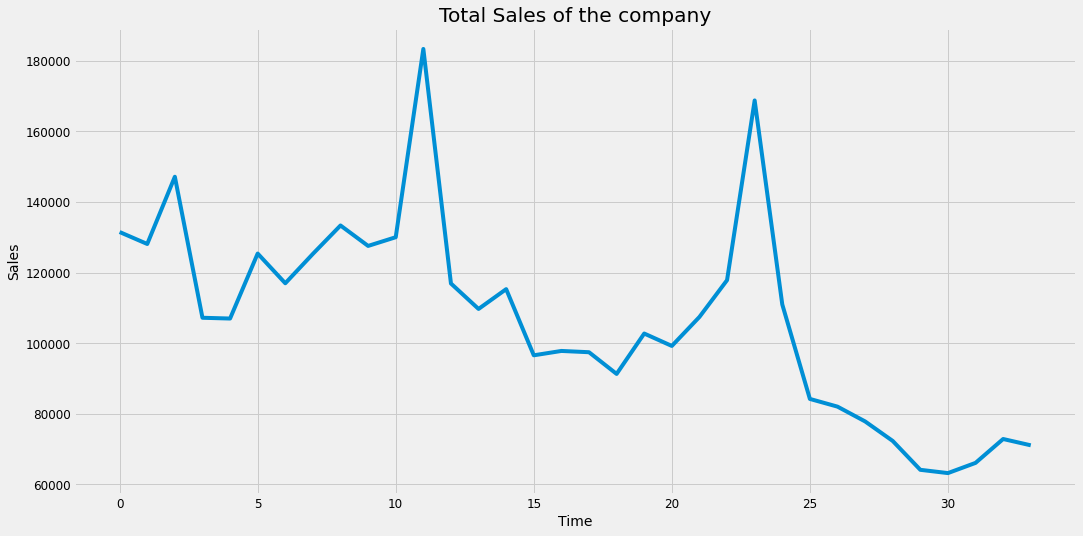

In [ ]:
ts=df.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)

In [ ]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [ ]:
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.395704
p-value                         0.142953
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


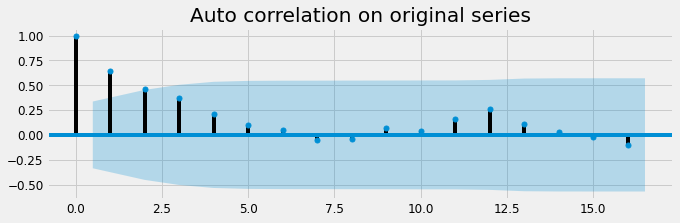

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(311)
fig=plot_acf(ts,ax=ax1,title='Auto correlation on original series')


In [ ]:
fig=plt.figure(figsize=(10,10))
ax2=fig.add_subplot(312)
fig=plot_acf(ts.diff().dropna(),ax=ax2,title='Auto correlation on original 1st order differencing')


In [ ]:
fig=plt.figure(figsize=(10,10))
ax3=fig.add_subplot(313)
fig=plot_acf(ts.diff().dropna(),ax=ax3,title='Auto correlation on original 2nd order differencing')

In [ ]:
ts.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('time',fontsize=20)

In [ ]:
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts=ts.loc[:,["index","item_cnt_day"]]
ts.columns = ['confirmed_date','count']
ts.head()

,confirmed_date,count
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [ ]:
count=ts[['count']]

In [ ]:
count.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('time',fontsize=20)

In [ ]:
model = ARIMA(ts['count'].values, order=(1, 1, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   33
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -373.574
Method:                       css-mle   S.D. of innovations          19171.546
Date:                Sun, 26 Jul 2020   AIC                            755.147
Time:                        16:09:10   BIC                            761.133
Sample:                             1   HQIC                           757.161
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1930.2075    547.470     -3.526      0.001   -3003.228    -857.187
ar.L1.D.y      0.4257      0.163      2.616      0.014       0.107       0.745
ma.L1.D.y     -1.0000      0.090    -11.110      0.000      -1.176      -0.824
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3491           +0.0000j            2.3491            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

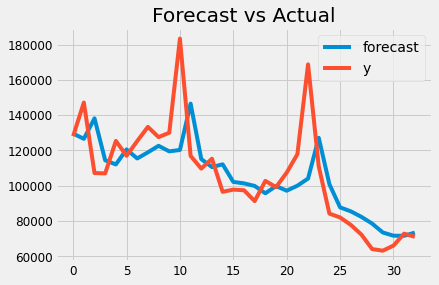

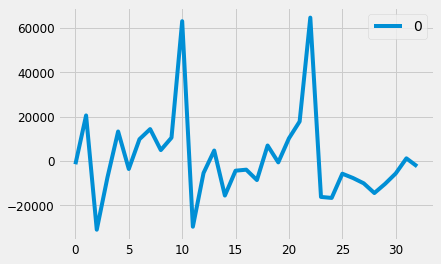

In [ ]:
fit_model.plot_predict()
plt.title('Forecast vs Actual')
pd.DataFrame(fit_model.resid).plot()
forcast = fit_model.forecast(steps=6)
pred_y = forcast[0].tolist()
pred = pd.DataFrame(pred_y)

In [ ]:
model = ARIMA(ts['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()

In [ ]:
fit_model.plot_predict()
plt.title('Forecast vs Actual')
pd.DataFrame(fit_model.resid).plot()
forcast = fit_model.forecast(steps=6)
pred_y = forcast[0].tolist()
pred = pd.DataFrame(pred_y)

In [ ]:
fit_model.summary()

In [ ]:
###prophet
ts=df.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
ts=ts.reset_index()
ts.head()

In [ ]:
ts.columns=['ds','y']
ts.head()

In [ ]:
from fbprophet import Prophet
#prophet reqiures a pandas df at the below config 
# ( date column named as DS and the value column as Y)
model = Prophet( yearly_seasonality=True) #instantiate Prophet with only yearly seasonality as our data is monthly 
model.fit(ts) #fit the model with your dataframe

In [ ]:
future = model.make_future_dataframe(periods = 5, freq = 'MS')  
# now lets make the forecasts
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
model.plot(forecast)

In [ ]:
#import itertools
#p = d = q = range(0, 2)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
##print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
##print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
##print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
##print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [ ]:
##for param in pdq:
    #for param_seasonal in seasonal_pdq:
       # try:
           # mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
#results = mod.fit()
#print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
       # except:
           # continue

In [ ]:
#pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
#pred_ci = pred.conf_int()
#ax = y['2013':].plot(label='observed')
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
#ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
#ax.set_xlabel('Date')
#ax.set_ylabel('Furniture Sales')
#plt.legend()
#plt.show()